# Boundary value problem

### In general case:

$L[y]=y''+p(x)y+q(x)y=f(x)$

$l_a[y]=\alpha_0y(a)+\alpha_1y'(a)=A$

$l_b[y]=\beta_0y(b)+\beta_1y'(b)=B$

for $x\in[a,b]$

## 1. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}-\frac{dy}{dx}\ln(x)-2y=1$ for $x \in [0.5,1.5]$

### with the boundary conditions:

$y(0.5)+y'(0.5)=1$, $y(1.5)-y'(1.5)=0$

1.1. Solve this problem using finite difference method of the second order. Use the uniform grid. Is this method stable for step size $h=0.125$? Find number of grid points required to achieve accuracy of the order of 1e-6.

### *Don't forget to include the boundary conditions!*

1.2. Use the first order one-sided numerical approximation for the first derivative and write a new scheme. Find number of grid points required to achieve accuracy of the order of 1e-6.

1.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from scipy.integrate import quad

In [219]:
def SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, N=100):
    '''
    in:
    a,b - float, limits of x, N - int, number of grid points
    A,B - float, boundary values
    alpha, beta - array of float, coefficients for boundary conditions in general case
    p(x), g(x), f(x) - functions from general equation
    
    you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    out: 
    y - array of float, solution of the BVP
    '''

    grid = np.linspace(a, b, N)
    h = grid[1] - grid[0]

    r_values = np.array([f(x) for x in grid])
    p_values = np.array([p(x) for x in grid])
    q_values = np.array([q(x) for x in grid])

    if np.max(abs(p_values * h)) >= 2:
        print('Instability alert!') # For task 1.1

    mat = np.zeros((N, N))

    # Left boundary

    mat[0, 0] = alpha[0] - 1.5 * alpha[1] / h
    mat[0, 1] = 2 * alpha[1] / h
    mat[0, 2] = -0.5 * alpha[1] / h

    r_values[0] = A # Fixing to get a correct equation.

    # Right boundary

    mat[-1, -1] = beta[0] + 1.5 * beta[1] / h
    mat[-1, -2] = -2 * beta[1] / h
    mat[-1, -3] = 0.5 * beta[1] / h

    r_values[-1] = B # Fixing to get a correct equation.

    # Middle

    for i in range(1, N - 1):
        mat[i, i - 1] = 1 / (h ** 2) - p_values[i] / (2 * h)
        mat[i, i] = -2 / (h ** 2) + q_values[i]
        mat[i, i + 1] = 1 / (h ** 2) + p_values[i] / (2 * h)


    return solve(mat, r_values)

In [220]:
def FirstOrderScheme(a, b, A, B, alpha, beta, p, q, f, N=100):
    '''
    in:
    a,b - float, limits of x, N - int, number of grid points
    A,B - float, boundary values
    alpha, beta - array of float, coefficients for boundary conditions in general case
    p(x), g(x), f(x) - functions from general equation
    
    you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    out: 
    y - array of float, solution of the BVP
    '''

    grid = np.linspace(a, b, N)
    h = grid[1] - grid[0]

    r_values = np.array([f(x) for x in grid])
    p_values = np.array([p(x) for x in grid])
    q_values = np.array([q(x) for x in grid])

    mat = np.zeros((N, N))

    # Left boundary

    mat[0, 0] = alpha[0] - alpha[1] / h
    mat[0, 1] = alpha[1] / h

    r_values[0] = A # Fixing to get a correct equation.

    # Right boundary

    mat[-1, -1] = beta[0] + beta[1] / h
    mat[-1, -2] = -beta[1] / h

    r_values[-1] = B # Fixing to get a correct equation.

    # Middle

    for i in range(1, N - 1):
        mat[i, i - 1] = 1 / (h ** 2)
        mat[i, i] = -2 / (h ** 2) + q_values[i] - p_values[i] / h
        mat[i, i + 1] = 1 / (h ** 2) + p_values[i] / h

    return solve(mat, r_values)

In [221]:
def p(x):
    return -np.log(x)
def q(x):
    return -2
def f(x):
    return 1

a = 0.5
b = 1.5
alpha = [1, 1]
beta = [1, -1]
A = 1
B = 0

In [222]:
tol = 1e-2
N = 100
y = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)
while True:
    N = 2 * N - 1
    y_new = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)

    if (np.max(abs(y_new[::2] - y))) <= tol:
        break
    else:
        y = y_new
N_second = N
y_second = y_new
print('Для second order:', N)

Для second order: 397


In [223]:
tol = 5e-2
N = 100
y = FirstOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)
while True:
    N = 2 * N - 1
    y_new = FirstOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)

    if (np.max(abs(y_new[::2] - y))) <= tol:
        break
    else:
        y = y_new
N_first = N
y_first = y_new
print('Для first order:', N)

Для first order: 6337


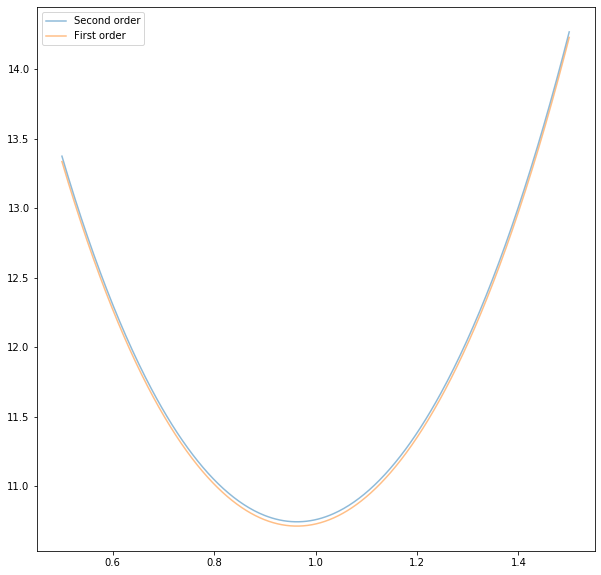

In [224]:
plt.figure(figsize=(10, 10))
plt.plot(np.linspace(a, b, N_second), y_second, '-', alpha=0.5, label='Second order')
plt.plot(np.linspace(a, b, N_first), y_first, '-', alpha=0.5, label='First order')
plt.legend()
plt.show()

* Ну я честно подождал, пока отработает first order, но происходит это сильно дольше, чем в second order, поэтому точность для него понижена. Но вообще можно сказать, что алгоритмы, конечно, сходятся к одному и тому же, однако, как я и сказал, second order делает это сильно быстрее.

Проверим для $N = 9$, что соответствует $h = 0.125$:


In [225]:
y = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, 9)

Сообщения об ошибке нет, значит все в порядке.

# 2. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}+2\frac{dy}{dx}-3xy=\frac{2-8x}{x^3}$ for $x \in [1,2]$

### with the boundary conditions:

$y(1)=1$, $y(2)=0.5$

2.1. Solve this problem using finite difference method of the second order. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.2. Solve this problem using Galerkin method with power basis functions. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [226]:
def p(x):
    return 2
def q(x):
    return -3 * x
def f(x):
    return (2 - 8 * x) / (x ** 3)

a = 1
b = 2
alpha = [1, 0]
beta = [1, 0]
A = 1
B = 0.5

In [227]:
tol = 1e-2
N = 100
y = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)
while True:
    N = 2 * N - 1
    y_new = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)

    if (np.max(abs(y_new[::2] - y))) <= tol:
        break
    else:
        y = y_new
N_second_2 = N
y_second_2 = y_new
print('Для second order:', N)

Для second order: 199


Галеркин везде как-то плохо написан, так что коротенько опишу, что делаю. Возьмем самые простые полиномы, которые сможем придумать. Нам нужным нули на краях, это раз, и при $n = 0$ нам на границах нужны граничные условия. Поэтому при $n = 0$, решив систему, мы хотим функцию $y = \frac{3}{2} - x$. А для остальных возьмем $(x - 1) (x - 2) \left(x - 1 + \frac{1}{n} \right)^{n - 1}$.

Не хочется писать все функции в общем виде (да и я честно говоря сомневаюсь что тут это реально без особых потерь сделать), поэтому сделаем для нашей конкретной задачи.

In [228]:
def basis(x, n):
    if n == 0:
        return 3 / 2 - x / 2
    else:
        return (x - 2) * (x - 1) * (x - 1 + 1 / n) ** (n - 1)

def dif_basis(x, n):
    if n == 0:
        return -1 / 2
    else: 
        return  (x - 2) * (x - 1) * (n - 1) * (x - 1 + 1 / n) ** (n - 2) + (x - 2) * (x - 1 + 1 / n) ** (n - 1) + (x - 1) * (x - 1 + 1 / n) ** (n - 1)

def dif_dif_basis(x, n):
    if n == 0:
        return 0
    else:
        return (x - 2) * (x - 1) * (n - 1) * (n - 2) * (x - 1 + 1 / n) ** (n - 3) + 2 * (x - 1 + 1 / n) ** (n - 1) + 2 * (n - 1) * (x - 1 + 1 / n) ** (n - 2) * (2 * x - 3)

In [229]:
def left_(i, j):
    return quad(lambda x:(dif_dif_basis(x, j) + 2 * dif_basis(x, j) - 3 * x * basis(x, j)) * basis(x, i), a, b)[0]

def right_(i):
    return quad(lambda x:((2 - 8 * x) / (x ** 3) - (dif_dif_basis(x, 0) + 2 * dif_basis(x, 0) - 3 * x * basis(x, 0))) * basis(x, i), a, b)[0]

In [230]:
q = 0
tol = 1e-2

grid_g = np.linspace(a, b, N_second_2)

y = np.zeros_like(grid_g)

while True:

    q += 1

    l = np.zeros([q, q])
    r = np.empty(q)
    for i in range(q):
        r[i] = right_(i + 1)
        for j in range(q):
            l[i, j] = left_(i + 1, j + 1)

    solution_ = solve(l,r)
    y_new = basis(grid_g, 0)
    for i in range(q):
        y_new += solution_[i] * basis(grid_g, i + 1)
    if np.max(abs(y_new - y)) <= tol:
        break
    else:
        y = y_new

y_galerkin = y_new
print('Требуемое число полиномов:', q)

Требуемое число полиномов: 3


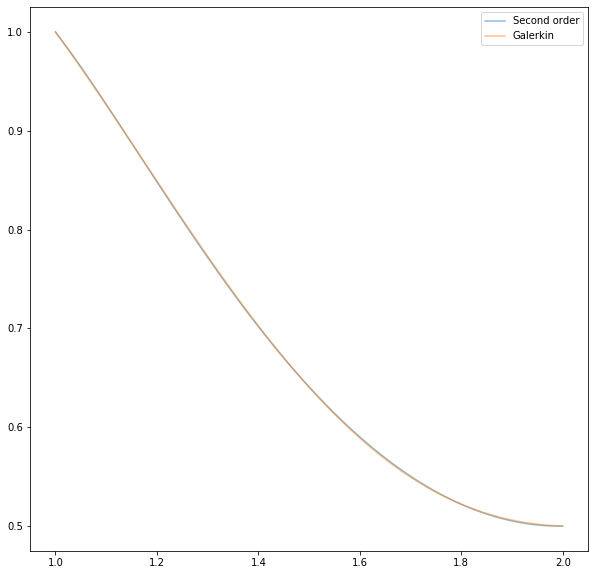

In [231]:
plt.figure(figsize=(10, 10))
plt.plot(np.linspace(a, b, N_second_2), y_second_2, '-', alpha=0.5, label='Second order')
plt.plot(grid_g, y_galerkin, '-', alpha=0.5, label='Galerkin')
plt.legend()
plt.show()

По ощущениям Галеркин отрабатывает быстрее. Заметил также, что если увеличить точность, то число полиномов сильно не меняется (на ```1e-6```, например, кажется, нужно было всего 4).

# 3. Additional task. Consider the following boundary value problem:

$$\frac{d^2 y}{d x^2} + x^2 \frac{d y}{d x} - x y = \frac{6}{x^4} - \frac{3}{x}$$

### with the boundary conditions:

$y(1)=1$, $y(2)=0.25$

The ground truth solution is $y = \dfrac{1}{x^2}$.

In [232]:
def p(x):
    return x ** 2
def q(x):
    return -x
def f(x):
    return 6 / (x ** 4) - 3 / x
def gr_truth(x):
    return 1 / (x ** 2)

a = 1
b = 2
alpha = [1, 0]
beta = [1, 0]
A = 1
B = 0.25

In [233]:
tol = 1e-2
N = 100
y = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)
while True:
    N = 2 * N - 1
    y_new = SecondOrderScheme(a, b, A, B, alpha, beta, p, q, f, N)

    if (np.max(abs(y_new[::2] - y))) <= tol:
        break
    else:
        y = y_new
N_second_3 = N
y_second_3 = y_new
print('Для second order:', N)

Для second order: 199


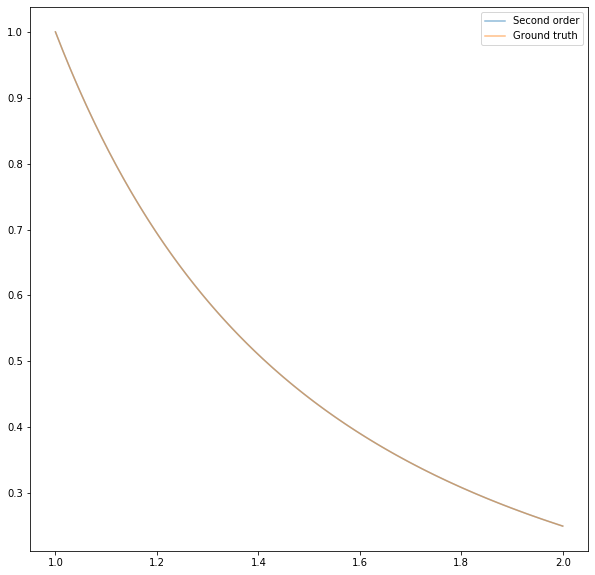

In [234]:
grid_assist = np.linspace(a, b, int(1e3))
plt.figure(figsize=(10, 10))
plt.plot(np.linspace(a, b, N_second_3), y_second_3, '-', alpha=0.5, label='Second order')
plt.plot(grid_assist, gr_truth(grid_assist), '-', alpha=0.5, label='Ground truth')
plt.legend()
plt.show()

Ого, метод, который решал диффуры до этого, решил очередной диффур.